C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


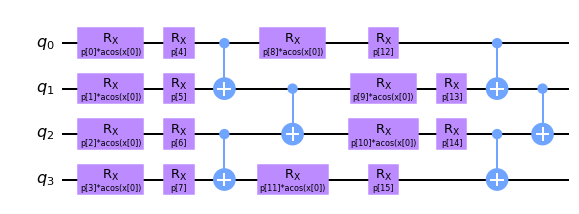

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn.encoding_circuit import ChebyshevRx
from squlearn.observables import SummedPaulis
from squlearn.util import Executor
from squlearn.qnn import QNNRegressor,SquaredLoss
from squlearn.optimizers import Adam

from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum")

nqubits = 4
number_of_layers = 2

pqc = ChebyshevRx(nqubits, 1, num_layers=number_of_layers)
pqc.draw("mpl")

In [2]:
executor = Executor(service,auto_backend_mode="speed",log_file="log_qnn_para1.txt")
executor.set_shots(5000)

In [3]:
obs = SummedPaulis(nqubits)
print(obs)

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[3]),
 ParameterExpression(1.0*p[4])])


In [4]:

param_ini = np.array([-0.22306392,  0.96833378,  1.9085548,   1.2089074,   0.92015667,  0.77409331,
 -0.6506603 ,  0.22301956,  1.91325895, -0.20817139,  1.56411373,  0.54160768,
 -1.32168944,  0.45814232,  0.06255112,  0.12734099])
param_op_ini = np.array([-2.22039551,  1.99646609, -1.92925272,  3.44809977,  0.78566664])

In [5]:
reg = QNNRegressor(pqc, obs, executor, SquaredLoss(), Adam(), param_ini, param_op_ini)

Automatic backend selection started
Number of backends available with given parameters:12
Mode: speed using Mapomatic
Input circuit needs 4 qubits
Least busy backend: ibm_osaka with 127 qubits
Transpiled circuit needs 4 qubits on ibm_osaka
Best sub-layout: [75, 90, 94, 95]. Error_rate: 0.028224697061974613


In [6]:
backend = executor.backend

C:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\src\squlearn\qnn\qnnr.py:151: UserWarning: The model is not fitted.
  warn("The model is not fitted.")


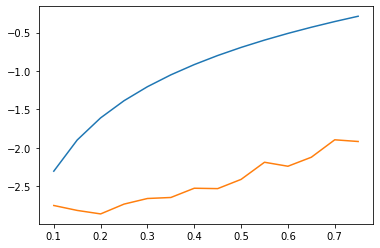

In [7]:
x_space = np.arange(0.1, 0.9, 0.1)
x = np.arange(np.min(x_space), np.max(x_space), 0.05)
y = reg.predict(x)
plt.plot(x, np.log(x))
plt.plot(x, y)

In [8]:
executor = Executor(backend,log_file="log_qnn_para3.txt",qpu_parallelization=3)
executor.set_shots(5000)
reg = QNNRegressor(pqc, obs, executor, SquaredLoss(), Adam(), param_ini, param_op_ini)

In [9]:
x_space = np.arange(0.1, 0.9, 0.1)
x = np.arange(np.min(x_space), np.max(x_space), 0.05)
y = reg.predict(x)
plt.plot(x, np.log(x))
plt.plot(x, y)

C:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\src\squlearn\qnn\qnnr.py:151: UserWarning: The model is not fitted.
  warn("The model is not fitted.")
Traceback (most recent call last):
  File "C:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\src\squlearn\util\executor.py", line 643, in _primitive_run
    job = run()
  File "C:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\src\squlearn\util\executor.py", line 810, in run
    return self.estimator.run(circuits, observables, parameter_values, **kwargs)
  File "C:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\src\squlearn\util\execution\parallel_estimator.py", line 195, in run
    duplicated_circ, duplicated_obs = self.create_mapped_circuit(
  File "C:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\src\squlearn\util\execution\parallel_estimator.py", line 310, in create_mapped_circuit
    raise ValueError(
ValueError: The number of qubits in the circuit (127) * n_duplica

ValueError: The number of qubits in the circuit (127) * n_duplications (3) is greater than the total number of qubits in the backend (127)

In [ ]:
executor.set_shots(15000)
x_space = np.arange(0.1, 0.9, 0.1)
x = np.arange(np.min(x_space), np.max(x_space), 0.05)
y = reg.predict(x)
plt.plot(x, np.log(x))
plt.plot(x, y)